In [2]:
import epa.model.steps
model_set1 = epa.model.steps.violation()

from drain import step
step.OUTPUTDIR = '/mnt/data/nysdec/epa-ny/drain/'

In [2]:
step.load(model_set1)

[FitPredict(inputs=[Construct(__class_name__='sklearn.ensemble.RandomForestClassifier',
      criterion='entropy', max_features='sqrt', n_estimators=500, n_jobs=-1), EpaTransform(day=1, evaluation=False, exclude=set([]), handlers={}, icis={},
        impute=True, include=set([]), investigations={},
        investigations_expand_counts=False, month=1, normalize=True,
        outcome_expr='aux.violation_epa', region=None, rmp={},
        train_query='aux.evaluation_epa', train_years=2, year=2011)],
       prefit=False, return_estimator=False,
       return_feature_importances=True, return_predictions=True),
 FitPredict(inputs=[Construct(__class_name__='sklearn.ensemble.RandomForestClassifier',
      criterion='entropy', max_features='sqrt', n_estimators=500, n_jobs=-1), EpaTransform(day=1, evaluation=False, exclude=set([]), handlers={}, icis={},
        impute=True, include=set([]), investigations={},
        investigations_expand_counts=False, month=1, normalize=True,
        outcome_ex

In [16]:

model_set1[0].get_result()

{'feature_importances':                                                feature  importance
 680             handlers_facility_all_receive_date_max    0.025366
 434    manifest_facility_all_manifest_line_items_count    0.018485
 432     manifest_facility_5y_manifest_line_items_count    0.018443
 516              handlers_facility_5y_receive_date_max    0.016074
 42                                         handler_age    0.014058
 606             handlers_facility_all_handler_sqg_prop    0.012767
 319    investigations_facility_all_start_date_days_max    0.011488
 643  handlers_facility_all_handler_location_eq_mail...    0.010967
 377    investigations_facility_all_start_date_days_min    0.010760
 607           handlers_facility_all_handler_cesqg_prop    0.010696
 604   handlers_facility_all_handler_not_generator_prop    0.010376
 599                        handlers_facility_all_count    0.010302
 715                                           state_NY    0.009737
 645            handlers_

In [8]:
from drain import explore, model

In [9]:
df = explore.to_dataframe(model_set1)

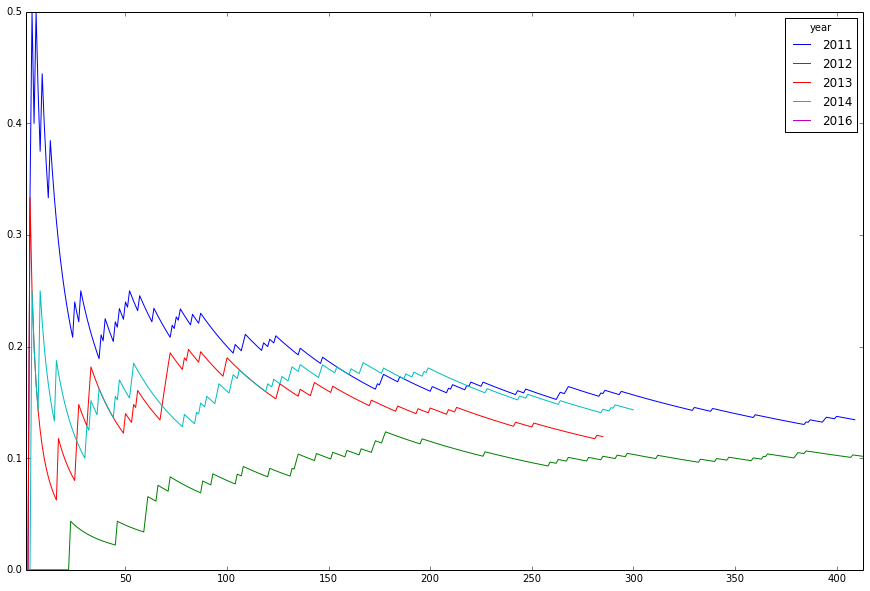

In [13]:
%matplotlib inline
explore.apply(df, model.precision_series, k=500, dropna=True).plot(figsize=(15,10))

In [3]:
reload(epa.model.steps)
model_set2 = epa.model.steps.violation_state()

In [4]:
step.load(model_set2)

[FitPredict(inputs=[Construct(__class_name__='sklearn.ensemble.RandomForestClassifier',
      criterion='entropy', max_features='sqrt', n_estimators=500, n_jobs=-1), EpaTransform(day=1, evaluation=False, exclude=set([]), handlers={}, icis={},
        impute=True, include=set([]), investigations={},
        investigations_expand_counts=False, month=1, normalize=True,
        outcome_expr='aux.violation_state', region=None, rmp={},
        train_query='aux.evaluation_state', train_years=1, year=2011)],
       prefit=False, return_estimator=False,
       return_feature_importances=True, return_predictions=True),
 FitPredict(inputs=[Construct(__class_name__='sklearn.ensemble.RandomForestClassifier',
      criterion='entropy', max_features='sqrt', n_estimators=500, n_jobs=-1), EpaTransform(day=1, evaluation=False, exclude=set([]), handlers={}, icis={},
        impute=True, include=set([]), investigations={},
        investigations_expand_counts=False, month=1, normalize=True,
        outcom

In [24]:
model_set2[0].get_result()

{'feature_importances':                                                feature  importance
 687             handlers_facility_all_receive_date_max    0.042958
 446     manifest_facility_5y_manifest_line_items_count    0.031622
 448    manifest_facility_all_manifest_line_items_count    0.031133
 721                                           state_NJ    0.021583
 722                                           state_NY    0.017033
 530              handlers_facility_5y_receive_date_max    0.015892
 42                                         handler_age    0.013954
 391    investigations_facility_all_start_date_days_min    0.013816
 613             handlers_facility_all_handler_sqg_prop    0.013031
 333    investigations_facility_all_start_date_days_max    0.012131
 650  handlers_facility_all_handler_location_eq_mail...    0.011524
 611   handlers_facility_all_handler_not_generator_prop    0.010821
 606                        handlers_facility_all_count    0.010229
 612             handlers

In [25]:
df = explore.to_dataframe(model_set2)

In [26]:
df

,train_years,year,step
0,1,2011,FitPredict(inputs=[Construct(__class_name__='s...
1,1,2012,FitPredict(inputs=[Construct(__class_name__='s...
2,1,2013,FitPredict(inputs=[Construct(__class_name__='s...
3,1,2014,FitPredict(inputs=[Construct(__class_name__='s...
4,1,2016,FitPredict(inputs=[Construct(__class_name__='s...
5,2,2011,FitPredict(inputs=[Construct(__class_name__='s...
6,2,2012,FitPredict(inputs=[Construct(__class_name__='s...
7,2,2013,FitPredict(inputs=[Construct(__class_name__='s...
8,2,2014,FitPredict(inputs=[Construct(__class_name__='s...
9,2,2016,FitPredict(inputs=[Construct(__class_name__='s...


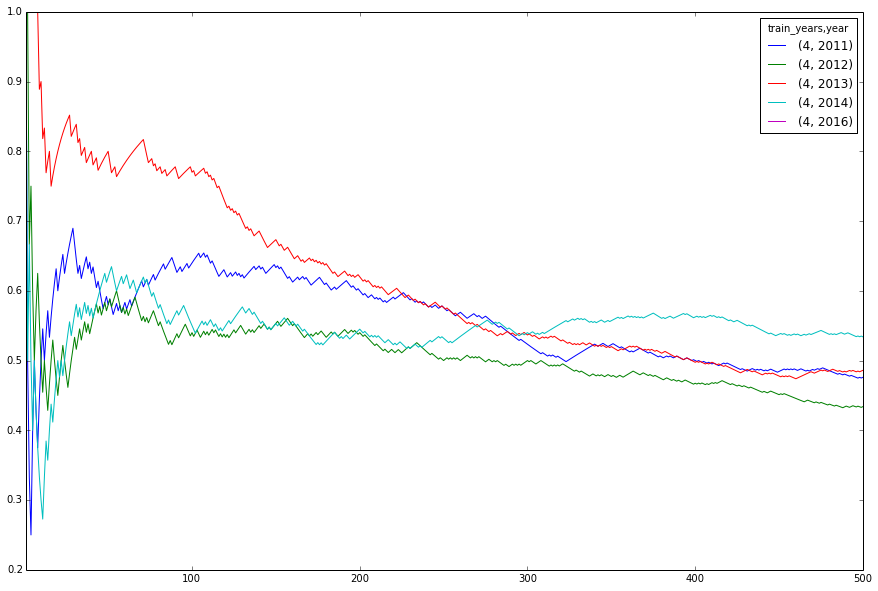

In [33]:
explore.apply(df.query('train_years == 4'), model.precision_series, k=500, dropna=True).plot(figsize=(15,10))

In [34]:
## Adding var, min, max

In [5]:
reload(epa.model.steps)
model_set3 = step.load(epa.model.steps.violation_state())

In [6]:
len(model_set3)

12

In [7]:
model_set3[0].get_result()

{'feature_importances':                                                feature  importance
 688             handlers_facility_all_receive_date_max    0.038876
 442                manifest_facility_5y_approx_qty_min    0.023745
 441                manifest_facility_5y_approx_qty_max    0.023241
 440              manifest_facility_5y_line_items_count    0.023168
 448               manifest_facility_all_approx_qty_min    0.022990
 446             manifest_facility_all_line_items_count    0.022007
 447               manifest_facility_all_approx_qty_max    0.021997
 443                manifest_facility_5y_approx_qty_var    0.019199
 449               manifest_facility_all_approx_qty_var    0.018709
 532              handlers_facility_5y_receive_date_max    0.015587
 614             handlers_facility_all_handler_sqg_prop    0.013711
 42                                         handler_age    0.013697
 385    investigations_facility_all_start_date_days_min    0.013511
 331    investigations_fa

In [9]:
model_set3[2].get_result()

{'feature_importances':                                                feature  importance
 680             handlers_facility_all_receive_date_max    0.037453
 434               manifest_facility_all_approx_qty_max    0.015454
 435               manifest_facility_all_approx_qty_min    0.014862
 606             handlers_facility_all_handler_sqg_prop    0.014368
 323    investigations_facility_all_start_date_days_max    0.013782
 379    investigations_facility_all_start_date_days_min    0.013751
 433             manifest_facility_all_line_items_count    0.013533
 436               manifest_facility_all_approx_qty_var    0.013366
 519              handlers_facility_5y_receive_date_max    0.013251
 372  investigations_facility_all_violation_determin...    0.012221
 643  handlers_facility_all_handler_location_eq_mail...    0.011959
 373  investigations_facility_all_actual_return_to_c...    0.011716
 639   handlers_facility_all_handler_include_in_br_prop    0.011587
 607           handlers_f

In [62]:
df = explore.to_dataframe(model_set3)

In [63]:
df

,train_years,year,step
0,1,2011,FitPredict(inputs=[Construct(__class_name__='s...
1,1,2013,FitPredict(inputs=[Construct(__class_name__='s...
2,1,2016,FitPredict(inputs=[Construct(__class_name__='s...
3,2,2011,FitPredict(inputs=[Construct(__class_name__='s...
4,2,2013,FitPredict(inputs=[Construct(__class_name__='s...
5,2,2016,FitPredict(inputs=[Construct(__class_name__='s...
6,3,2011,FitPredict(inputs=[Construct(__class_name__='s...
7,3,2013,FitPredict(inputs=[Construct(__class_name__='s...
8,3,2016,FitPredict(inputs=[Construct(__class_name__='s...
9,4,2011,FitPredict(inputs=[Construct(__class_name__='s...


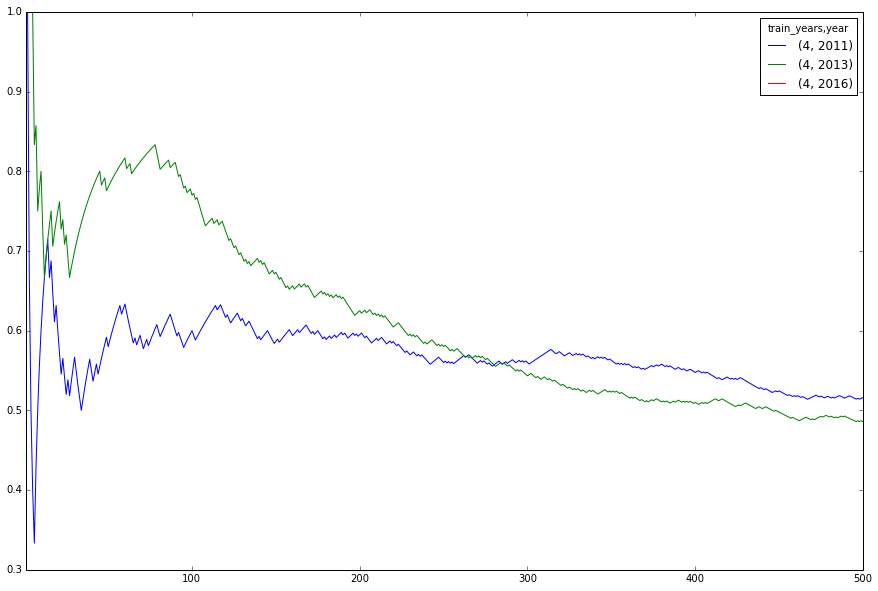

In [64]:
explore.apply(df.query('train_years == 4'), model.precision_series, k=500, dropna=True).plot(figsize=(15,10))

In [7]:
import epa.model.workflow
model_set4 = epa.model.workflow.violation_state()

from drain import step
step.OUTPUTDIR = '/mnt/data/nysdec/epa-ny/drain/'

In [8]:
step.load(model_set4)

[FitPredict(inputs=[Construct(__class_name__='sklearn.ensemble.RandomForestClassifier',
      criterion='entropy', max_features='sqrt', n_estimators=500, n_jobs=-1), EpaTransform(day=1, evaluation=False, exclude=set([]), handlers={}, icis={},
        impute=True, include=set([]), investigations={},
        investigations_expand_counts=False, month=1, normalize=True,
        outcome_expr='aux.violation_state', region=None, rmp={},
        train_query='aux.evaluation_state', train_years=2, year=2013)],
       prefit=False, return_estimator=False,
       return_feature_importances=True, return_predictions=True),
 FitPredict(inputs=[Construct(__class_name__='sklearn.ensemble.RandomForestClassifier',
      criterion='entropy', max_features='sqrt', n_estimators=500, n_jobs=-1), EpaTransform(day=1, evaluation=False, exclude=set([]), handlers={}, icis={},
        impute=True, include=set([]), investigations={},
        investigations_expand_counts=False, month=1, normalize=True,
        outcom

In [9]:
from drain import explore, model
df = explore.to_dataframe(model_set4)
df

,train_years,year,step
0,2,2011,FitPredict(inputs=[Construct(__class_name__='s...
1,2,2012,FitPredict(inputs=[Construct(__class_name__='s...
2,2,2013,FitPredict(inputs=[Construct(__class_name__='s...
3,2,2014,FitPredict(inputs=[Construct(__class_name__='s...
4,2,2015,FitPredict(inputs=[Construct(__class_name__='s...
5,3,2011,FitPredict(inputs=[Construct(__class_name__='s...
6,3,2012,FitPredict(inputs=[Construct(__class_name__='s...
7,3,2013,FitPredict(inputs=[Construct(__class_name__='s...
8,3,2014,FitPredict(inputs=[Construct(__class_name__='s...
9,3,2015,FitPredict(inputs=[Construct(__class_name__='s...


In [16]:
model_set4[2].get_result()

{'feature_importances':                                                feature    importance
 697             handlers_facility_all_receive_date_max  4.919019e-02
 42                                         handler_age  1.447593e-02
 449               manifest_facility_all_approx_qty_std  1.444619e-02
 448               manifest_facility_all_approx_qty_var  1.420643e-02
 623             handlers_facility_all_handler_sqg_prop  1.280119e-02
 434               manifest_facility_5y_approx_qty_mean  1.242803e-02
 447              manifest_facility_all_approx_qty_mean  1.231043e-02
 436                manifest_facility_5y_approx_qty_std  1.201248e-02
 450              manifest_facility_all_approx_qty_skew  1.185942e-02
 446               manifest_facility_all_approx_qty_min  1.177096e-02
 373    investigations_facility_all_start_date_days_min  1.125363e-02
 624           handlers_facility_all_handler_cesqg_prop  1.116839e-02
 432                manifest_facility_5y_approx_qty_max  1.108349e-

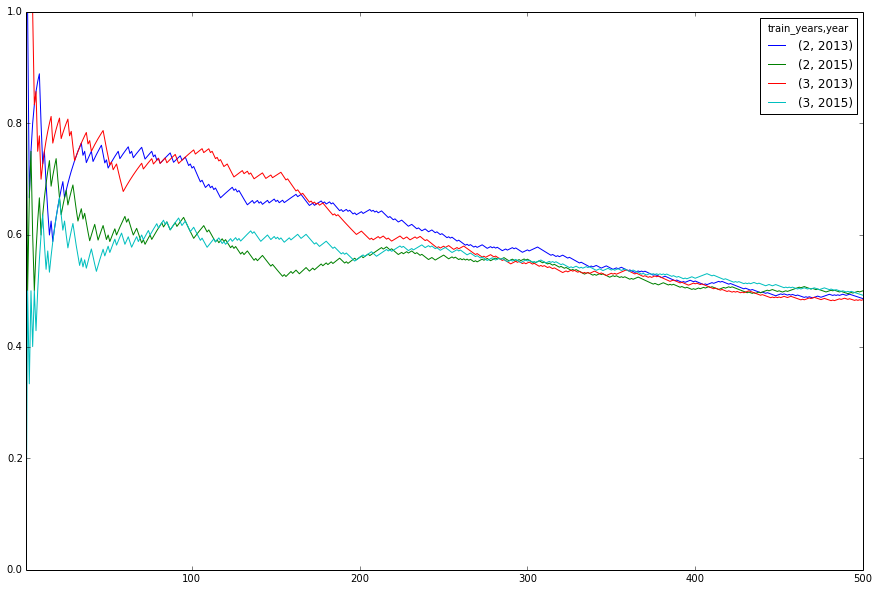

In [10]:
%matplotlib inline
explore.apply(df.query('year == 2013 or year == 2015'), model.precision_series, k=500, dropna=True).plot(figsize=(15,10))